# MarketPlace Property values check

This is document cheks the marketPlace using the python library Pandas.

*One question about the API: is there a call I could use to see all the
"values" that are behind a given dynamic property? Example: all the
terms/words that are used to populate "activity" or "material" for all
the items in the MP (or by class). I know that for "activity" we are
supposed to have only terms coming from TADIRAH and Nemo, but this is
exactly what I would like to check.*

Main results are [here](https://docs.google.com/spreadsheets/d/1RumPVwXA4SSzheaKs6r0ymR41d8VsbMbG-19edAzd58/edit?usp=sharing)


## Preamble

In [234]:
import ast
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# importing useful Python utility libraries we'll need
from collections import Counter, defaultdict
import itertools

from bokeh.io import output_notebook, show
from bokeh.plotting import figure

### Function to download descriptions from the MarketPlace dataset using the API

In [116]:
def getMPDescriptions (url, pages):
    mdx = pd.Series(range(1, pages+1))
    df_desc = pd.DataFrame()
    for var in mdx:
        turl = url+str(var)+"&perpage=20"
        #print("url: "+ turl + ":",var)
        df_desc_par=pd.read_json(turl, orient='columns')
        df_desc=df_desc.append(df_desc_par, ignore_index=True)
        
    return (df_desc)

## Check the *property* values using API

The SSHOC Market Place API entry: 

https://sshoc-marketplace-api.acdh-dev.oeaw.ac.at/api/property-types

has been used to extract the to get the list of dynamic properties in the SSHOC Market Place. 

There are 28  property types in MP dataset. The following table shows code, labels and type

In [74]:
x = ('1','2')
df_dynammic_properties = pd.DataFrame()
for var in x:
    url = "https://sshoc-marketplace-api.acdh-dev.oeaw.ac.at/api/property-types?page="+str(var)+"&perpage=20"
    df_tool_par=pd.read_json(url, orient='columns')
    df_dynammic_properties=df_dynammic_properties.append(df_tool_par, ignore_index=True)
    #print("url: "+ url + ":",var)
#df_dynammic_properties.head()

In [80]:
#properties are returned as JSON object, create a dataframe
#pd.reset_option('max_colwidth')
df_dypro_flat = pd.json_normalize(df_dynammic_properties['propertyTypes'])
df_dypro_flat_sub=df_dypro_flat[['code', 'label', 'type']]
df_dypro_flat_sub.sort_values('label').head(30)#.style.set_properties(subset=['allowedVocabularies'], **{'width': '300px'})



,code,label,type
37,accesspolicy-url,Access Policy URL,string
1,activity,Activity,concept
29,authentication,Authentication,string
18,conference,Conference,string
14,cover-image,Cover Image,url
25,doi,DOI,string
30,geographical-availabilities,Geographical Availabilities,string
36,helpdesk-url,Helpdesk URL,string
20,issue,Issue,string
17,journal,Journal,string


In [86]:
#df_dypro_flat.head()

#### Property Types with vocabularies

In [88]:
df_prop_data = pd.json_normalize(data = df_dynammic_properties['propertyTypes'], record_path='allowedVocabularies', meta_prefix='Property_type_', meta=['label'])
df_prop_data.sort_values('code').head(20)

,code,label,accessibleAt,Property_type_label
6,iana-mime-type,IANA mime/type,None,Object format
0,iso-639-3,ISO 639-3,None,Language
1,iso-639-3-v2,ISO 639-3 Sprachcodes,None,Language
2,nemo-activity-type,NeMO Concept Scheme,None,Activity
7,publication-type,The Bibliographic Ontology Concept Scheme,None,Publication type
4,tadirah-activity,TaDiRAH - Taxonomy of Digital Research Activities in the Humanities,None,Activity
5,tadirah-research-technique,TaDiRAH Research Technique,None,Technique
3,tadirah2,,None,Activity


## Get the the dataset descriptions and check them

## Tools and services

In [117]:
df_tool_all = pd.DataFrame()
df_tool_all =getMPDescriptions ("https://sshoc-marketplace-api.acdh-dev.oeaw.ac.at/api/tools-services?page=", 81)
df_tool_all.index

RangeIndex(start=0, stop=1606, step=1)

Have a look at how data is structured

In [129]:
df_tool_flat = pd.json_normalize(df_tool_all['tools'])
df_tool_flat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1606 entries, 0 to 1605
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   id                                       1606 non-null   int64 
 1   category                                 1606 non-null   object
 2   label                                    1606 non-null   object
 3   version                                  0 non-null      object
 4   persistentId                             1606 non-null   object
 5   description                              1606 non-null   object
 6   licenses                                 1606 non-null   object
 7   contributors                             1606 non-null   object
 8   properties                               1606 non-null   object
 9   accessibleAt                             1606 non-null   object
 10  sourceItemId                             1606 non-null   obj

Create a subset and work with it

In [131]:
df_tool_work=df_tool_flat[['id', 'category', 'label', 'licenses', 'contributors', 'accessibleAt', 'sourceItemId']]
df_tool_work.head()

,id,category,label,licenses,contributors,accessibleAt,sourceItemId
0,30509,tool-or-service,140kit,[],"[{'actor': {'id': 483, 'name': 'Ian Pearce, Devin Gaffney', 'externalIds': [], 'website': None, 'email': None, 'affiliations': []}, 'role': {'code': 'contributor', 'label': 'Contributor'}}]",[https://github.com/WebEcologyProject/140kit],937
1,28542,tool-or-service,3DF Zephyr - photogrammetry software - 3d models from photos,[],[],[https://www.3dflow.net/3df-zephyr-pro-3d-models-from-photos/],WQFP6XPS
2,11508,tool-or-service,3DHOP,[],[],[http://vcg.isti.cnr.it/3dhop/],SG86ZG5J
3,11419,tool-or-service,3DHOP: 3D Heritage Online Presenter,[],[],[https://github.com/cnr-isti-vclab/3DHOP],R379NADX
4,11507,tool-or-service,3DReshaper \| 3DReshaper,[],[],[https://www.3dreshaper.com/en/],PMES8DJW


Individuate duplicates based on values of property *label*

In [153]:
df_tool_work_duplicates=df_tool_work[df_tool_work.duplicated('label', keep=False)].sort_values('label')
df_tool_work_duplicates.sort_values('label').head()

,id,category,label,licenses,contributors,accessibleAt,sourceItemId
203,11448,tool-or-service,CloudCompare - Documentation,[],[],[http://www.cloudcompare.org/doc/],9M24UQEJ
204,27972,tool-or-service,CloudCompare - Documentation,[],[],[http://www.danielgm.net/cc/documentation.html],EEFMCRUG
286,29438,tool-or-service,Cytoscape,[],"[{'actor': {'id': 326, 'name': 'Cytoscape Consortium', 'externalIds': [], 'website': 'http://www.cytoscape.org/', 'email': None, 'affiliations': []}, 'role': {'code': 'contributor', 'label': 'Cont...",[http://cytoscape.org/],122
287,30178,tool-or-service,Cytoscape,[],[],[http://www.cytoscape.org/],552
294,30140,tool-or-service,Data Desk,[],"[{'actor': {'id': 501, 'name': 'Ambrosia Software Inc.', 'externalIds': [], 'website': None, 'email': None, 'affiliations': []}, 'role': {'code': 'contributor', 'label': 'Contributor'}}, {'actor':...",[https://datadescription.com/],511


In [277]:
df_tool_work_duplicates.sort_values('label').to_csv(path_or_buf='/Users/cesare/Documents/sshoc/wp7/duplicatedtools.csv')
df_tool_work_duplicates_av=df_tool_work[df_tool_work.duplicated('label', keep="first")].sort_values('label')
av=df_tool_work_duplicates_av.count()[0]
tv=df_tool_work_duplicates.count()[0]
print (f'\nThere are {av} duplicated tool/service descriptions, for a total number of {tv} records affected\n')


There are 27 duplicated tool/service descriptions, for a total number of 51 records affected



The list of duplicated Tools and Services is available as google sheet [here](https://docs.google.com/spreadsheets/d/1RumPVwXA4SSzheaKs6r0ymR41d8VsbMbG-19edAzd58/edit?usp=sharing)

#### Check values in property *accessibleAt* 

In [166]:
df_tool_work.sort_values('accessibleAt').head()

,id,category,label,licenses,contributors,accessibleAt,sourceItemId
802,30474,tool-or-service,music21,[],[],[],904
1297,29573,tool-or-service,TextSTAT- Simple Text Analysis Tool,[],"[{'actor': {'id': 953, 'name': 'freie universität berlin', 'externalIds': [], 'website': None, 'email': None, 'affiliations': []}, 'role': {'code': 'contributor', 'label': 'Contributor'}}]",[],1362
570,29417,tool-or-service,ImageMagik,[],"[{'actor': {'id': 806, 'name': 'ImageMagick Studio LLC', 'externalIds': [], 'website': None, 'email': None, 'affiliations': []}, 'role': {'code': 'contributor', 'label': 'Contributor'}}]",[],1209
572,30494,tool-or-service,ImagePlot,[],"[{'actor': {'id': 791, 'name': 'Software Studies Initiative', 'externalIds': [], 'website': None, 'email': None, 'affiliations': []}, 'role': {'code': 'contributor', 'label': 'Contributor'}}]",[],923
1293,29461,tool-or-service,TextPad,[],"[{'actor': {'id': 332, 'name': 'Helios Software Solutions', 'externalIds': [], 'website': None, 'email': None, 'affiliations': []}, 'role': {'code': 'contributor', 'label': 'Contributor'}}]",[],1251


In [160]:
df_tool_work_emptyurls=df_tool_work[df_tool_work['accessibleAt'].str.len()==0]
emptyurldescriptionsn=df_tool_work_emptyurls.count()[0]
print(f'\n There are {emptyurldescriptionsn} descriptions without corresponding accessibleAt value\n')


 There are 507 descriptions without corresponding accessible at URLs



Check the validity of URLs in the *accessibleAt* properties

In [212]:
df_tool_work_urls=df_tool_work[df_tool_work['accessibleAt'].str.len()>0]
df_urls=df_tool_work_urls['accessibleAt'].values
#for url in df_urls:
#    print (url[0])
df_tool_work_aa_http_status = pd.DataFrame (columns = ['url','status'])
import requests
import re
regex = re.compile(
        r'^(?:http|ftp)s?://' # http:// or https://
        r'(?:(?:[A-Z0-9](?:[A-Z0-9-]{0,61}[A-Z0-9])?\.)+(?:[A-Z]{2,6}\.?|[A-Z0-9-]{2,}\.?)|' #domain...
        r'localhost|' #localhost...
        r'\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3})' # ...or ip
        r'(?::\d+)?' # optional port
        r'(?:/?|[/?]\S+)$', re.IGNORECASE)
for var in df_urls:
   # print(var)
    if ( var != "" and var!=None and re.match(regex, var[0])):
        try:
            r =requests.get(var[0],timeout=8)
            #print("result: "+var+ " ",r.status_code)
            df_tool_work_aa_http_status = df_tool_work_aa_http_status.append({'url': var, 'status': int(r.status_code)}, ignore_index=True)
        except requests.exceptions.ConnectionError:
          #  print(var)
            df_tool_work_aa_http_status = df_tool_work_aa_http_status.append({'url': var, 'status': int(503)}, ignore_index=True)
        except requests.exceptions.ConnectTimeout:
          #  print(var)
            df_tool_work_aa_http_status = df_tool_work_aa_http_status.append({'url': var, 'status': int(408)}, ignore_index=True)
        except requests.exceptions.ReadTimeout:
         #   print(var)
            df_tool_work_aa_http_status = df_tool_work_aa_http_status.append({'url': var, 'status': int(408)}, ignore_index=True)
        except requests.exceptions.RequestException:
         #   print(var)
            df_tool_work_aa_http_status = df_tool_work_aa_http_status.append({'url': var, 'status': int(500)}, ignore_index=True)
        except TypeError:
        #    print(var)
            df_tool_work_aa_http_status = df_tool_work_aa_http_status.append({'url': var, 'status': int(400)}, ignore_index=True)
    else:
       # print(var ,0)
        df_tool_work_aa_http_status = df_tool_work_aa_http_status.append({'url': var, 'status': int(400)}, ignore_index=True)
df_tool_work_aa_http_status.head()

,url,status
0,"(https://github.com/WebEcologyProject/140kit,)",200
1,"(https://www.3dflow.net/3df-zephyr-pro-3d-models-from-photos/,)",200
2,"(http://vcg.isti.cnr.it/3dhop/,)",200
3,"(https://github.com/cnr-isti-vclab/3DHOP,)",200
4,"(https://www.3dreshaper.com/en/,)",200


In [213]:
df_tool_work_aa_http_status.head()

,url,status
0,"(https://github.com/WebEcologyProject/140kit,)",200
1,"(https://www.3dflow.net/3df-zephyr-pro-3d-models-from-photos/,)",200
2,"(http://vcg.isti.cnr.it/3dhop/,)",200
3,"(https://github.com/cnr-isti-vclab/3DHOP,)",200
4,"(https://www.3dreshaper.com/en/,)",200


In [214]:
df_http_status_sub=df_tool_work_aa_http_status[df_tool_work_aa_http_status['status'] != 1]
df_db_st = df_http_status_sub['status'].value_counts()
df_db_st.head(10)

200    940
404     95
503     28
403     14
406     10
408      5
500      3
420      2
502      1
400      1
Name: status, dtype: int64

The first column in the table above shows the HTTP Status codes (https://en.wikipedia.org/wiki/List_of_HTTP_status_codes) obtained when trying to connect on *accessibleAt* URLs of tool descriptions, the second column the total number of URLs returning the status. 

There is a significant number of URLs that seems not valid, i.e. 404 Not Found.

Notice that while 404 means that the link is not valid, other status codes may indicate temporary problems.

In [ ]:
df_http_status_err=df_http_status_sub[df_http_status_sub['status'] == 404]

df_http_status_err['url']=df_http_status_err.url.apply(tuple)

df_tool_work_sub=df_tool_work
df_tool_work_sub['accessibleAt']=df_tool_work_sub.accessibleAt.apply(tuple)

df_list_of_tools_wrongaa=pd.merge(left=df_tool_work_sub, right=df_http_status_err, left_on='accessibleAt', right_on='url')
#df_list_of_tools_wrongaa.head()
df_list_of_tools_wrongaa[['id', 'label', 'url', 'status']].sort_values('id').to_csv(path_or_buf='/Users/cesare/Documents/sshoc/wp7/wrongurlstatus.csv')

The list of possibly wrong URL is [here](https://docs.google.com/spreadsheets/d/1RumPVwXA4SSzheaKs6r0ymR41d8VsbMbG-19edAzd58/edit?usp=sharing)

#### Overview of the values in *properties* for tools and service descriptions

In [266]:
df_prop_data = pd.json_normalize(data=df_tool_all['tools'], record_path='properties', meta=['label'])
df_prop_data.head(2)

,id,value,type.code,type.label,type.type,type.ord,type.allowedVocabularies,concept.code,concept.vocabulary.code,concept.vocabulary.label,concept.vocabulary.accessibleAt,concept.label,concept.notation,concept.definition,concept.uri,concept,label
0,183640,None,activity,Activity,concept,2,"[{'code': 'nemo-activity-type', 'label': 'NeMO Concept Scheme', 'accessibleAt': None}, {'code': 'tadirah2', 'label': '', 'accessibleAt': None}, {'code': 'tadirah-activity', 'label': 'TaDiRAH - Tax...",https://vocabs.dariah.eu/tadirah/capturing,tadirah2,,NaN,Capturing,,,https://vocabs.dariah.eu/tadirah/capturing,NaN,140kit
1,183641,None,activity,Activity,concept,2,"[{'code': 'nemo-activity-type', 'label': 'NeMO Concept Scheme', 'accessibleAt': None}, {'code': 'tadirah2', 'label': '', 'accessibleAt': None}, {'code': 'tadirah-activity', 'label': 'TaDiRAH - Tax...",https://vocabs.dariah.eu/tadirah/gathering,tadirah2,,NaN,Gathering,,,https://vocabs.dariah.eu/tadirah/gathering,NaN,140kit


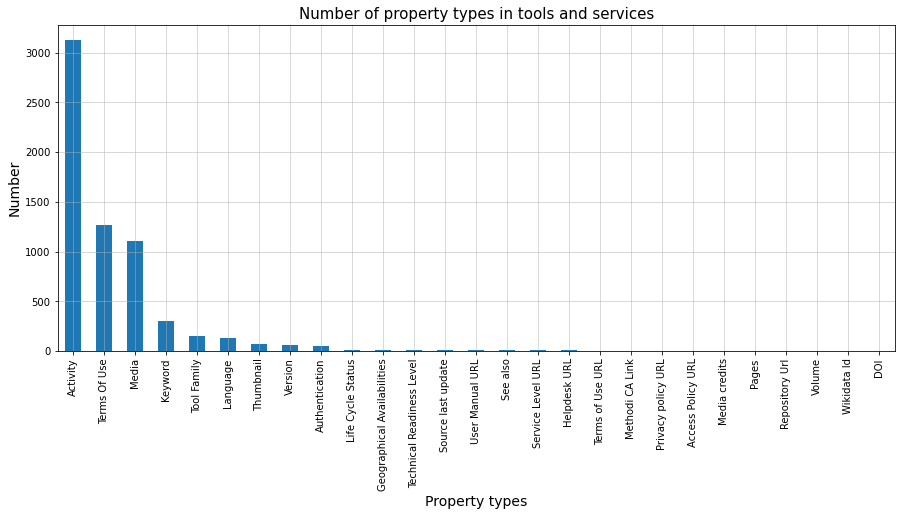

In [125]:
df_temp_type_label = df_prop_data['type.label'].value_counts()
fig, ax = plt.subplots()
df_temp_type_label.plot(kind='bar', figsize=(15,6), x='licences', y='tools',)
plt.grid(alpha=0.6)
ax.yaxis.set_label_text("")
ax.set_title("Number of property types in tools and services", fontsize=15)
ax.set_xlabel('Property types', fontsize=14)
ax.set_ylabel('Number', fontsize=14);
plt.show()

## Publications

In [ ]:
df_pub_all = pd.DataFrame()
df_pub_all =getMPDescriptions ("https://sshoc-marketplace-api.acdh-dev.oeaw.ac.at/api/publications?page=", 151)
df_pub_all.index

#### Overview of the values in properties for publications

In [271]:
df_prop__pub_data = pd.json_normalize(data=df_pub_all['publications'], record_path='properties', meta=['label'])
#df_prop__pub_data.tail()

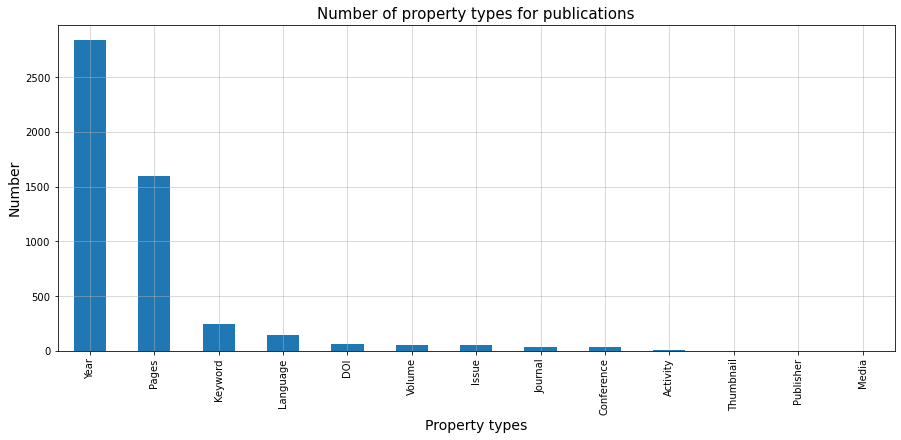

In [272]:
df_temp_pub_type_label = df_prop__pub_data['type.label'].value_counts()
fig, ax = plt.subplots()
df_temp_pub_type_label.plot(kind='bar', figsize=(15,6), x='licences', y='tools',)
plt.grid(alpha=0.6)
ax.yaxis.set_label_text("")
ax.set_title("Number of property types for publications", fontsize=15)
ax.set_xlabel('Property types', fontsize=14)
ax.set_ylabel('Number', fontsize=14);
plt.show()

## Training Materials

In [20]:
#https://sshoc-marketplace-api.acdh-dev.oeaw.ac.at/api/training-materials

tmx = pd.Series(range(1,8))
#url = 'https://sshoc-marketplace-api.acdh-dev.oeaw.ac.at/api/publications?page=1&perpage=20'
df_tm_all = pd.DataFrame()
for var in tmx:
    url = "https://sshoc-marketplace-api.acdh-dev.oeaw.ac.at/api/training-materials?page="+str(var)+"&perpage=20"
    df_tm_par=pd.read_json(url, orient='columns')
    df_tm_all=df_tm_all.append(df_tm_par, ignore_index=True)
   # print("url: "+ url + ":",var)
df_tm_all.index

RangeIndex(start=0, stop=140, step=1)

#### Overview of the values in properties for Training Materials

In [22]:
df_prop__tm_data = pd.json_normalize(data=df_tm_all['trainingMaterials'], record_path='properties', meta=['label'])
#df_prop__tm_data.head()

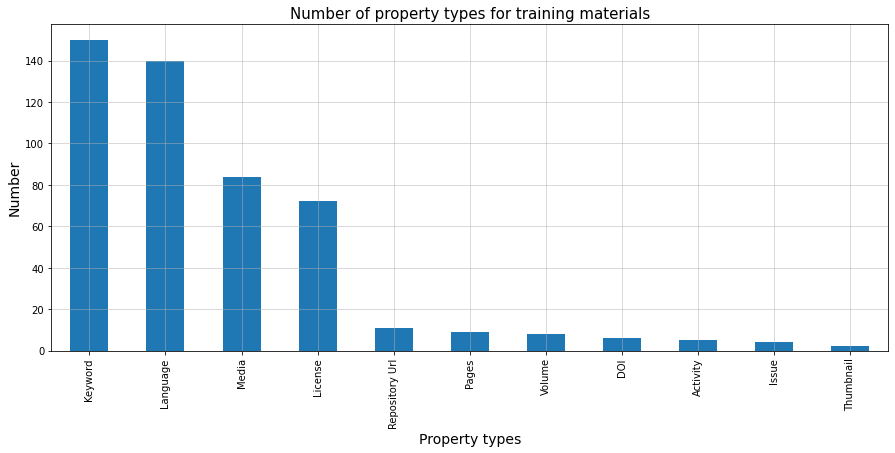

In [24]:
df_temp_tm_type_label = df_prop__tm_data['type.label'].value_counts()
fig, ax = plt.subplots()
df_temp_tm_type_label.plot(kind='bar', figsize=(15,6), x='licences', y='tools',)
plt.grid(alpha=0.6)
ax.yaxis.set_label_text("")
ax.set_title("Number of property types for training materials", fontsize=15)
ax.set_xlabel('Property types', fontsize=14)
ax.set_ylabel('Number', fontsize=14);
plt.show()

## Workflows

In [273]:
df_wf_all = pd.DataFrame()
df_wf_all =getMPDescriptions ("https://sshoc-marketplace-api.acdh-dev.oeaw.ac.at/api/workflows?page=", 2)
df_wf_all.index

RangeIndex(start=0, stop=29, step=1)

#### Overview of the values in properties in Workflows

In [274]:
df_prop__wf_data = pd.json_normalize(data=df_wf_all['workflows'], record_path='properties', meta=['label'])
#df_prop__wf_data.head()

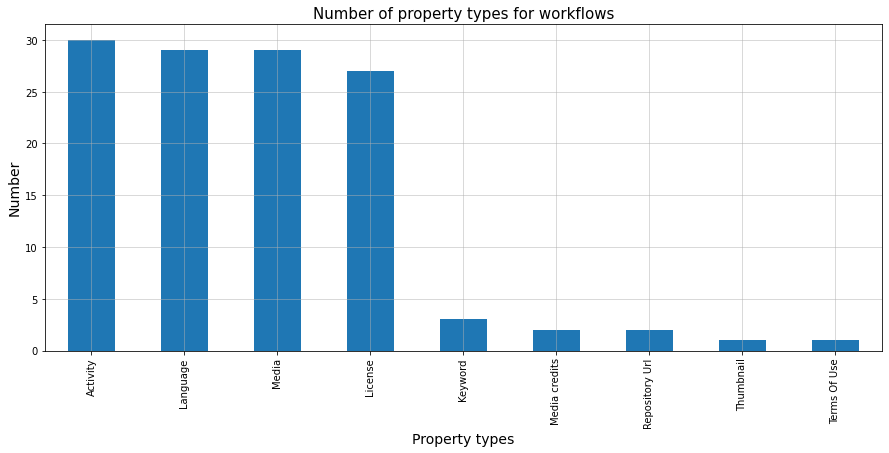

In [275]:
df_temp_wf_type_label = df_prop__wf_data['type.label'].value_counts()
fig, ax = plt.subplots()
df_temp_wf_type_label.plot(kind='bar', figsize=(15,6), x='licences', y='tools',)
plt.grid(alpha=0.6)
ax.yaxis.set_label_text("")
ax.set_title("Number of property types for workflows", fontsize=15)
ax.set_xlabel('Property types', fontsize=14)
ax.set_ylabel('Number', fontsize=14);
plt.show()

#### Check properties in the complete dataset

In [67]:
df_list=[df_prop_data, df_prop__pub_data, df_prop__tm_data, df_prop__wf_data]
df_all_data=pd.concat(df_list)
#df_all_data.sort_values('type.code').iloc[7550:7590]

In [278]:
tad_prop=df_all_data[df_all_data['concept.vocabulary.code'] == 'tadirah2']
tad_prop.head(2)

,id,value,type.code,type.label,type.type,type.ord,type.allowedVocabularies,concept.code,concept.vocabulary.code,concept.vocabulary.label,concept.vocabulary.accessibleAt,concept.label,concept.notation,concept.definition,concept.uri,concept,label
0,183640,None,activity,Activity,concept,2,"[{'code': 'nemo-activity-type', 'label': 'NeMO Concept Scheme', 'accessibleAt': None}, {'code': 'tadirah2', 'label': '', 'accessibleAt': None}, {'code': 'tadirah-activity', 'label': 'TaDiRAH - Tax...",https://vocabs.dariah.eu/tadirah/capturing,tadirah2,,NaN,Capturing,,,https://vocabs.dariah.eu/tadirah/capturing,NaN,140kit
1,183641,None,activity,Activity,concept,2,"[{'code': 'nemo-activity-type', 'label': 'NeMO Concept Scheme', 'accessibleAt': None}, {'code': 'tadirah2', 'label': '', 'accessibleAt': None}, {'code': 'tadirah-activity', 'label': 'TaDiRAH - Tax...",https://vocabs.dariah.eu/tadirah/gathering,tadirah2,,NaN,Gathering,,,https://vocabs.dariah.eu/tadirah/gathering,NaN,140kit


In [41]:
df_temp_tad_label = tad_prop['concept.label'].value_counts()
df_temp_tad_label.head(15)

Analyzing           576
Visual Analysis     303
Content Analysis    226
Discovering         171
Capturing           150
Enriching           121
Gathering           116
Disseminating       112
Annotating          112
Publishing           87
Collaborating        87
Creating             85
Sharing              84
Organizing           81
Network Analysis     77
Name: concept.label, dtype: int64

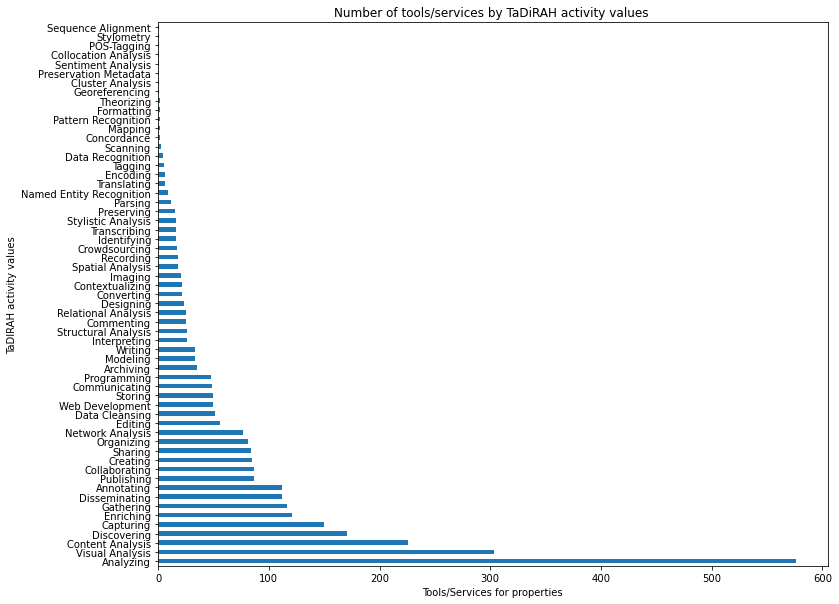

In [42]:
fig, ax = plt.subplots()
df_temp_tad_label.plot.barh(figsize=(12,10), ax=ax)
ax.set_title('Number of tools/services by TaDiRAH activity values ')
ax.set_xlabel('Tools/Services for properties')
ax.set_ylabel('TaDIRAH activity values');

In [44]:
#printing in a file all TaDiRAH activities in the MP
act_prop_temp=tad_prop[['type.label', 'value', 'type.code', 'type.type', 'concept.label', 'concept.uri', 'concept.vocabulary.code', 'concept.vocabulary.label']]
act_prop=act_prop_temp.drop_duplicates()
act_prop.head()

,type.label,value,type.code,type.type,concept.label,concept.uri,concept.vocabulary.code,concept.vocabulary.label
0,Activity,None,activity,concept,Capturing,https://vocabs.dariah.eu/tadirah/capturing,tadirah2,
1,Activity,None,activity,concept,Gathering,https://vocabs.dariah.eu/tadirah/gathering,tadirah2,
2,Activity,None,activity,concept,Analyzing,https://vocabs.dariah.eu/tadirah/analyzing,tadirah2,
3,Activity,None,activity,concept,Visual Analysis,https://vocabs.dariah.eu/tadirah/visualAnalysis,tadirah2,
26,Activity,None,activity,concept,Web Development,https://vocabs.dariah.eu/tadirah/webDevelopment,tadirah2,


In [50]:
act_prop.sort_values('concept.label').to_csv(path_or_buf='/Users/cesare/Documents/sshoc/wp7/actualtadirahvalues.csv')

See the [list of properties](https://docs.google.com/spreadsheets/d/1RumPVwXA4SSzheaKs6r0ymR41d8VsbMbG-19edAzd58/edit?usp=sharing) in a google sheet

### Finding item labels having duplicated TaDiRAH activities

In [49]:
df_p_d=tad_prop[tad_prop.duplicated(['label', 'concept.label'], keep=False)].sort_values('label')
#df_p_d.tail(2)

In [105]:
act_prop_temp_dupl=df_p_d[['label', 'concept.label', 'concept.uri','type.label', 'value', 'type.code', 'type.type', 'concept.vocabulary.code', 'concept.vocabulary.label']]
act_prop_temp_dupl.sort_values(['label','concept.label']).head(8)

,label,concept.label,concept.uri,type.label,value,type.code,type.type,concept.vocabulary.code,concept.vocabulary.label
14,Collaborative Digital Edition of a Musical Corpus,Formatting,https://vocabs.dariah.eu/tadirah/formatting,Activity,None,activity,concept,tadirah2,
12,Collaborative Digital Edition of a Musical Corpus,Formatting,https://vocabs.dariah.eu/tadirah/formatting,Activity,None,activity,concept,tadirah2,
1098,Cytoscape,Analyzing,https://vocabs.dariah.eu/tadirah/analyzing,Activity,None,activity,concept,tadirah2,
1103,Cytoscape,Analyzing,https://vocabs.dariah.eu/tadirah/analyzing,Activity,None,activity,concept,tadirah2,
1104,Cytoscape,Visual Analysis,https://vocabs.dariah.eu/tadirah/visualAnalysis,Activity,None,activity,concept,tadirah2,
1099,Cytoscape,Visual Analysis,https://vocabs.dariah.eu/tadirah/visualAnalysis,Activity,None,activity,concept,tadirah2,
1149,Data Desk,Analyzing,https://vocabs.dariah.eu/tadirah/analyzing,Activity,None,activity,concept,tadirah2,
1154,Data Desk,Analyzing,https://vocabs.dariah.eu/tadirah/analyzing,Activity,None,activity,concept,tadirah2,


In [51]:
act_prop_temp_dupl.sort_values('label').to_csv(path_or_buf='/Users/cesare/Documents/sshoc/wp7/duplicatetadirahvalues.csv')

## Inspecting *contributors* property for Tools and Services

In [284]:
df_prop_data = pd.json_normalize(data=df_tool_all['tools'], record_path='contributors', meta_prefix='tool_', meta=['label'])
df_prop_data.sort_values('tool_label').tail()

,actor.id,actor.name,actor.externalIds,actor.website,actor.email,actor.affiliations,role.code,role.label,tool_label
1333,546,Jason Davies,[],http://www.jasondavies.com/,None,[],contributor,Contributor,word tree
1316,794,word2vec Team,[],http://code.google.com/p/word2vec/,None,[],contributor,Contributor,word2vec
1329,704,iamsqrt1,[],https://code.google.com/u/iamsqrt1@gmail.com/,None,[],contributor,Contributor,wordsimilarity (Word 2 Word)
1348,896,"Centre for Computing in the Humanities, King's College London",[],http://www.tei-c.org/Vault/MembersMeetings/2008/xmod/index.html,None,[],contributor,Contributor,xMod
1355,950,yWorks,[],None,None,[],contributor,Contributor,yED Files


In [287]:
df_prop_data['actor.name'].value_counts().head()

Geoffrey Rockwell et. al.                50
Stéfan Sinclair and Geoffrey Rockwell    22
Tomasz Walkowiak                         19
Clarin-PL                                19
Ambrosia Software Inc.                   18
Name: actor.name, dtype: int64

In [299]:
df_prop_data.count()

actor.id              1372
actor.name            1372
actor.externalIds     1372
actor.website          566
actor.email            293
actor.affiliations    1372
role.code             1372
role.label            1372
tool_label            1372
dtype: int64